In [1]:
import pandas as pd
import numpy as np

top_num=10

df = pd.read_csv("train.shuf.csv")
df.target.astype(int)
dfs_info = pd.read_csv("songs.csv")
dfu_info = pd.read_csv("members.csv")

Index(['周杰倫 (Jay Chou)', '五月天 (Mayday)', '林俊傑 (JJ Lin)', '田馥甄 (Hebe)',
       'aMEI (張惠妹)', '陳奕迅 (Eason Chan)', '玖壹壹', 'G.E.M.鄧紫棋', 'BIGBANG',
       '謝和弦 (R-chord)', 'Maroon 5', 'A-Lin', 'Eric 周興哲', '蔡依林 (Jolin Tsai)',
       '蘇打綠 (Sodagreen)', '楊丞琳 (Rainie Yang)', '丁噹 (Della)',
       '梁靜茹 (Fish Leong)', 'The Chainsmokers', '郭靜 (Claire Kuo)',
       '林宥嘉 (Yoga Lin)', '八三夭 (The Last Day of Summer 831)', '蕭敬騰 (Jam Hsiao)',
       '吳克群 (Kenji Wu)', '韋禮安 (William Wei)', 'Alan Walker', '李榮浩',
       '周湯豪 (NICKTHEREAL)', '莊心妍', 'S.H.E', 'Bruno Mars', '孫燕姿 (Yanzi Sun)',
       '江蕙 (Jody Jiang)', '陳勢安 (Andrew Tan)', '孫盛希 (Shi Shi)', 'Justin Bieber',
       '徐佳瑩 (Lala Hsu)', '范瑋琪 (Christine Fan)', '王力宏 (Leehom Wang)',
       '張學友 (Jacky Cheung)', '兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116)', 'Ed Sheeran',
       '動力火車 (Power Station)', '畢書盡 (Bii)', 'BANGTAN BOYS', '蔡健雅 (Tanya Chua)',
       'Taylor Swift', 'CHARLIE PUTH', 'TWICE', '蕭煌奇 (Ricky Hsiao)',
       '羅志祥 (Show Lo)', 'MP魔幻力量 (Magic Power)', 'Adel

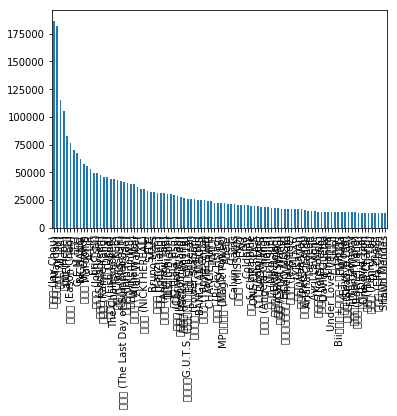

In [2]:
dfs_info.head()

dfs_info['artist_name'] = dfs_info['artist_name'].apply(lambda x: str(x).strip('|').split('|'))

dfs_info.head()

df_context = pd.merge(df, dfs_info, on='song_id', how='left')

df_context_explode = df_context.explode('artist_name')

artist_counts = df_context_explode['artist_name'].value_counts()

filter_num=101
artist_counts[1:filter_num].plot(kind='bar')
artist_counts[1:filter_num].sum()
myfilter = artist_counts[1:filter_num].index
myfilter

In [3]:
dfs_info_explode = dfs_info.explode('artist_name')

dfs_info_filter = dfs_info_explode[ dfs_info_explode.artist_name.isin(myfilter) ]

item = dfs_info_filter[ ['genre_ids', 'artist_name' ] ]

item['genre_ids'] = item['genre_ids'].apply( lambda x : str(x).split('|'))

item = item.explode('genre_ids')

genre_gby = item.groupby('artist_name')['genre_ids'].apply(list)

item = genre_gby.reset_index()

def merge(mylist):
    return "|".join(mylist)

item['genre_ids'] = item['genre_ids'].apply(set)
item['genre_ids'] = item['genre_ids'].apply(merge)

item.to_csv("item.csv", index = False)

item.head()

/home/johncreed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,artist_name,genre_ids
0,A-Lin,458|437|465|nan
1,Adele,465
2,Alan Walker,1616|1609
3,Ariana Grande,921|691|465|1609
4,Avril Lavigne,465|nan


In [4]:
df_context_filter = df_context_explode[ df_context_explode['artist_name'].isin(myfilter) ]

item_label = item.reset_index()
item_label = item_label.rename(columns={'index': 'label'}).drop(columns=['genre_ids'])

df_context_filter = pd.merge(df_context_filter, item_label, on='artist_name', how='left')

context = df_context_filter.drop(columns=['artist_name', 'composer', 'song_length', 'genre_ids', 'language', 'lyricist', 'target'])
context.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,label
0,iwarFAmI4+ZQJkQj8uixaLv2Fhd9OxiqsM6GOdR5vIo=,IXP1a2o3NL8WU4WK1X0WJAKaSW+LgGRpPDn4Gt1HrV8=,explore,Online playlist more,online-playlist,89
1,4Yx06AIYTO+9nk4KqV8LvixyVQ+lvuZhsZLHYVkZbyI=,PpTrkZZdp08y/9UzkAiZlvF10M5L4QIFZXLcxGyQdVY=,my library,Album more,album,17
2,TMFSvvHT64Sgxj8MfIybHsTix1oA1tYKAc5nMf0xQkI=,0KeIUGLjzwxHS73JeIh6lLwI2VkgX4Er5BbZGVvXaW8=,my library,Local playlist more,local-playlist,66
3,rv1UUP6uRlmRsQWoCmtz2i2PUtWSaN2OwP1byE5levI=,gw+P/fCTFHIhPf6Bm8Mhupa0THv8qywR/3JZYgnw0c0=,listen with,Others profile more,listen-with,59
4,gQvKOdJbOarixhDOwJA4TVGb7qYJg6aRrWyRUxwS5A0=,OUu+/tkAiy1ViRmp2orbzmNFVlKEBxohEp9SbTcgEcQ=,my library,Local playlist more,local-library,59


In [5]:
dset = {}
context['his'] = np.nan
context['his'] = context.his.apply(str)
for i, row in context.iterrows():
    user_id = row['msno']
    song_id = str(row['song_id'])
    if user_id in dset:
        context.set_value(i, 'his', '|'.join(dset[user_id][-50:]))
        dset[user_id].append(song_id)
    else:
        dset[user_id] = [song_id]
    if i % 100000 == 0:
        print(i)

context.tail()

0


/home/johncreed/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000


,msno,song_id,source_system_tab,source_screen_name,source_type,label,his
3227464,rXEuPKCm6TaxUlcmQJE+NDrrYZ+pHfkMvcUI7boBuYU=,yYs87L2Y0JgUXpPS+lix+NsNpZe8B2XoNI3G/EbN7yM=,my library,Local playlist more,local-library,56,ZR8NR3x8/NWKIL6rZ4z/55yHN0x2CkfMCwDZadRuDVk=|z...
3227465,h0fTru8nYMv9bR0j6kBh8kiXDaybzWBYaSHbUIVzeBs=,G0rUz0kguI35yzj95LX2BXI30PqCcJJtPNfirR0BhIs=,discover,Discover Chart,online-playlist,76,5TKFWT9ivwAJiqRWz5apDsePXcJZ2b1RA/1gxTm6XoQ=|I...
3227466,ALP8RATR99x8RhCaOtD+4MUvp1N1HDe1SeUKQwpKdIY=,8f/T4ohROj1wa25YHMItOW2/wJhRXZM0+T5/2p86COc=,my library,Local playlist more,local-library,91,PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=|4...
3227467,T0ELAXRujYMRSdn/zDJnha9WcQR8WiiyK7doDH9zjUE=,A7Z2nDVASy04EpmfzOL9PRMN3hFVbWQ7ah4J+o9sLnE=,my library,Local playlist more,local-library,72,fcaRi7ZgGGN/Sbcn3y4TLSja6N7Qf1HDMyQrtD9evog=|G...
3227468,5irfIzrd6NX6FCurni5XezbnUot32PNXXKLwMkjcAkw=,Ot8WIXZXzvgZeZoCwcimfORgLbZJJdslmuvO1ufZB7k=,discover,Online playlist more,online-playlist,96,gr6pXoiiCkTnJgdQiy9TnGJz+8m1rbmiqY3ePB8PX/U=|O...


In [6]:
context = pd.merge(context, dfu_info, on='msno', how='left')
context.head()
context = context.drop(columns=['registered_via', 'registration_init_time', 'expiration_date', 'bd'])

In [7]:
context.to_csv("context.csv", index = False)